<a href="https://colab.research.google.com/github/ctshiz/DEEP_LEARNING_STUDIES/blob/main/Training_a_simple_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, n_clusters_per_class =1, class_sep=1.5, random_state=5)

In [2]:
#replacing the zero target with the negative targets 
y[y==0]=-1

In [3]:
import seaborn as sns
import pandas as pd

In [4]:
df = pd.DataFrame(X, columns=['D1', 'D2'])

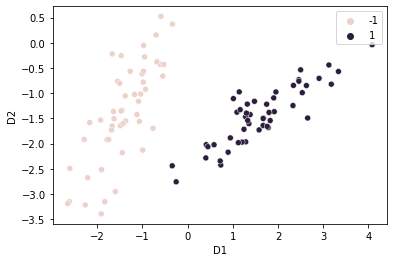

In [5]:
sns.scatterplot(data=df, x='D1', y='D2', hue=y)

THE PERCEPTRON LEARNING ALGORITHM

In [6]:
#add the number 1 to each input vector by adding a vector of ones to X with length N=100
import numpy as np
import random
X_train = np.append(np.ones((100,1)), X, 1)

In [7]:
def classification_error(w, X, y):
  s = np.sign(X.dot(w))
  return sum(s != y)

In [8]:
def choose_miscl_point(w, X, y):
  mispts = []
  for n in range(len(X)):
    if np.sign(w.T.dot(X[n])) != y[n]:
      mispts.append((X[n],y[n]))
  return mispts[random.randrange(0,len(mispts))]

In [9]:
#initialize the weights to zero
w = np.zeros(X_train.shape[1])
it = 0
while classification_error(w, X_train, y) != 0:
  it += 1
  #pickrandom misclassified point
  x, s = choose_miscl_point(w, X_train, y)
  #update weights
  w = w + s*x
  print("Total iterations: ", it)
  print("weigths are: ", w)

Total iterations:  1
weigths are:  [ 1.          1.30181576 -1.39476163]
Total iterations:  2
weigths are:  [ 0.          2.75431911 -0.05308743]
Total iterations:  3
weigths are:  [ 1.          2.41313767 -2.49338075]
Total iterations:  4
weigths are:  [ 0.          3.42291701 -1.87675274]
Total iterations:  5
weigths are:  [-1.          4.4171827   0.25268956]
Total iterations:  6
weigths are:  [ 0.          4.16331701 -2.505271  ]
Total iterations:  7
weigths are:  [-1.          4.93083124 -0.8101045 ]
Total iterations:  8
weigths are:  [ 0.          4.5896498  -3.25039782]
Total iterations:  9
weigths are:  [-1.          6.50181414  0.1438719 ]
Total iterations:  10
weigths are:  [ 0.          6.24794845 -2.61408866]


CONVERGENCE ON NON-LINEARLY SEPARABLE DATA

In [11]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, n_clusters_per_class=1, class_sep=1.0, random_state=5)

In [12]:
y[y==0]=-1

In [13]:
#add a column of ones
X_train = np.append(np.ones((100,1)), X, 1)

#initialize the weights to zeros
w = np.zeros(X_train.shape[1])
N = 100
it = 0
bestW = {}
#dictionary to keep best solution
bestW['err'] = N+1
bestW['it'] = it

#iterate until all points are correctly clssified or maximum iterations (i.e. 1000) are reached
while it < 1000:
  err = classification_error(w,X_train, y)
  #enter to save a new w
  if err < bestW['err']:
    bestW['err'] = err
    bestW['it'] = it
    bestW['w'] = list(w)
  #exit loop if there are no errors
  if err == 0:
    break
  it += 1
  #pick random misclassified point
  x,s = choose_miscl_point(w,X_train,y)
  #update weights
  w += s*x

print("Best found at iteration: ", bestW['it'])
print("Number of misclassified points: ", bestW['err'])



Best found at iteration:  23
Number of misclassified points:  1
